## `Fine-tuning keras models`
### `01: Diagnosing optimization problems`
Which of the following could prevent a model from showing an improved loss in its first few epochs? 

- Learning rate too low.
- Learning rate too high.
- Poor choice of activation function.
- All of the above. ✅

Well done! All the options listed could prevent a model from showing an improved loss in its first few epochs.'



### `02: Changing optimization parameters`
It's time to get your hands dirty with optimization. You'll now try optimizing a model at a very low learning rate, a very high learning rate, and a "just right" learning rate. You'll want to look at the results after running this exercise, remembering that a low value for the loss function is good.

For these exercises, we've pre-loaded the predictors and target values from your previous classification models (predicting who would survive on the Titanic). You'll want the optimization to start from scratch every time you change the learning rate, to give a fair comparison of how each learning rate did in your results. So we have created a function get_new_model() that creates an unoptimized model to optimize.


- Import SGD from tensorflow.keras.optimizers.
- Create a list of learning rates to try optimizing with called lr_to_test. The learning rates in it should be .000001, 0.01, and 1.
- Using a for loop to iterate over lr_to_test:
    - Use the get_new_model() function to build a new, unoptimized model.
    - Create an optimizer called my_optimizer using the SGD() constructor with keyword argument lr=lr.
    - Compile your model. Set the optimizer parameter to be the SGD object you created above, and because this is a classification problem, use 'categorical_crossentropy' for the loss parameter.
    - Fit your model using the predictors and target.

In [1]:
# Import necessary modules
import numpy as np 
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

predictors = np.load("datasets/predictors_v2.npy")
target = np.load("datasets/target_v2.npy")
input_shape=(predictors.shape[1], )


In [2]:
def get_new_model(input_shape = input_shape):
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape = input_shape))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    return(model)

In [3]:
# Import the SGD optimizer
from tensorflow.keras.optimizers import SGD

# Create list of learning rates: lr_to_test
lr_to_test = [.000001, 0.01, 1]

# Loop over learning rates
for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )
    
    # Build new model to test, unaffected by previous models
    model = get_new_model()
    
    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = SGD(lr=lr)
    
    # Compile the model
    model.compile(optimizer=my_optimizer, loss='categorical_crossentropy')
    
    # Fit the model
    model.fit(predictors, target)



Testing model with learning rate: 0.000001



c:\Users\ai_mo\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


28/28 [==============================] - 1s 2ms/step - loss: 5.6934


Testing model with learning rate: 0.010000

28/28 [==============================] - 0s 2ms/step - loss: 1.4678


Testing model with learning rate: 1.000000

28/28 [==============================] - 0s 2ms/step - loss: 12548736945225728.0000


Great work!



### `03: Evaluating model accuracy on validation dataset`
Now it's your turn to monitor model accuracy with a validation data set. A model definition has been provided as model. Your job is to add the code to compile it and then fit it. You'll check the validation score in each epoch.

- Compile your model using `'adam'` as the `optimizer` and `'categorical_crossentropy'` for the `loss`. To see what fraction of predictions are correct (the `accuracy`) in each epoch, specify the additional keyword argument `metrics=['accuracy']` in `model.compile()`.
- Fit the model using the `predictors` and `target`. Create a validation split of 30% (or `0.3`). This will be reported in each epoch.

In [4]:
# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model
hist = model.fit(predictors, target, validation_split=0.3)

20/20 [==============================] - 0s 11ms/step - loss: 0.8731 - accuracy: 0.6035 - val_loss: 0.5520 - val_accuracy: 0.7239


### `04: Early stopping: Optimizing the optimization`
Now that you know how to monitor your model performance throughout optimization, you can use early stopping to stop optimization when it isn't helping any more. Since the optimization stops automatically when it isn't helping, you can also set a high value for epochs in your call to .fit(), as Dan showed in the video.

The model you'll optimize has been specified as model. As before, the data is pre-loaded as predictors and target.

- Import `EarlyStopping` from `tensorflow.keras.callbacks`.
- Compile the model, once again using `'adam'` as the `optimizer`, `'categorical_crossentropy'` as the loss function, and `metrics=['accuracy']` to see the accuracy at each epoch.
- Create an `EarlyStopping` object called `early_stopping_monitor`. Stop optimization when the validation loss hasn't improved for 2 epochs by specifying the `patience` parameter of `EarlyStopping()` to be `2`.
- Fit the model using the `predictors` and `target`. Specify the number of `epochs` to be `30` and use a validation split of `0.3`. In addition, pass `[early_stopping_monitor]` to the `callbacks` parameter.

In [5]:
# Import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'] )

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Fit the model
model.fit(predictors, target, epochs=30, validation_split=0.3, 
          callbacks=[early_stopping_monitor])

Epoch 1/30
20/20 [==============================] - 1s 11ms/step - loss: 2.1199 - accuracy: 0.5650 - val_loss: 1.2419 - val_accuracy: 0.6679
Epoch 2/30
20/20 [==============================] - 0s 5ms/step - loss: 0.9287 - accuracy: 0.6276 - val_loss: 0.6556 - val_accuracy: 0.6567
Epoch 3/30
20/20 [==============================] - 0s 4ms/step - loss: 0.7389 - accuracy: 0.6501 - val_loss: 0.5956 - val_accuracy: 0.6642
Epoch 4/30
20/20 [==============================] - 0s 5ms/step - loss: 0.6929 - accuracy: 0.6517 - val_loss: 0.5234 - val_accuracy: 0.7313
Epoch 5/30
20/20 [==============================] - 0s 4ms/step - loss: 0.6542 - accuracy: 0.6549 - val_loss: 0.5870 - val_accuracy: 0.7425
Epoch 6/30
20/20 [==============================] - 0s 5ms/step - loss: 0.6840 - accuracy: 0.6549 - val_loss: 0.6075 - val_accuracy: 0.6604


Wonderful work! Because optimization will automatically stop when it is no longer helpful, it is okay to specify the maximum number of epochs as 30 rather than using the default of 10 that you've used so far. Here, it seems like the optimization stopped after 4 epochs.



### `05: Experimenting with wider networks` 

Experimenting with wider networks
Now you know everything you need to begin experimenting with different models!

A model called model_1 has been pre-loaded. You can see a summary of this model printed in the IPython Shell. This is a relatively small network, with only 10 units in each hidden layer.

In this exercise you'll create a new model called model_2 which is similar to model_1, except it has 100 units in each hidden layer.

After you create model_2, both models will be fitted, and a graph showing both models loss score at each epoch will be shown. We added the argument verbose=False in the fitting commands to print out fewer updates, since you will look at these graphically instead of as text.

Because you are fitting two models, it will take a moment to see the outputs after you hit run, so be patient.


- Create `model_2` to replicate `model_1`, but use `100` nodes instead of `10` for the first two `Dense` layers you add with the `'relu'` activation. Use `2` nodes for the `Dense` output layer with `'softmax'` as the `activation`.
- Compile `model_2` as you have done with previous models: Using `'adam'` as the `optimizer`, `'categorical_crossentropy'` for the loss, and `metrics=['accuracy']`.
- Hit 'Submit Answer' to fit both the models and visualize which one gives better results! Notice the keyword argument `verbose=False` in `model.fit()`: This prints out fewer updates, since you'll be evaluating the models graphically instead of through text.

In [6]:
import matplotlib.pyplot as plt 

# Create the new model: model_1
model_1 = Sequential()
# Add the first and second layers
model_1.add(Dense(10, activation='relu', input_shape=input_shape))
model_1.add(Dense(10, activation='relu'))
# Add the output layer
model_1.add(Dense(2, activation='softmax'))
# Compile model_2
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


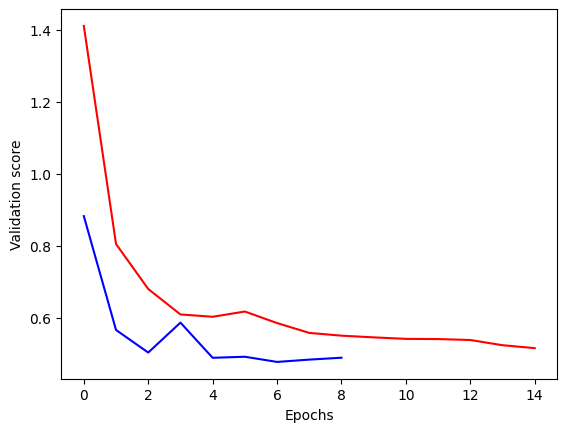

In [7]:
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Create the new model: model_2
model_2 = Sequential()

# Add the first and second layers
model_2.add(Dense(100, activation='relu', input_shape=input_shape))
model_2.add(Dense(100, activation='relu'))

# Add the output layer
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model_1
model_1_training = model_1.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Fit model_2
model_2_training = model_2.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

- The blue model is the one you made, the red is the original model. Your model had a lower loss value, so it is the better model. Nice job!



### `06: Adding layers to a network`
You've seen how to experiment with wider networks. In this exercise, you'll try a deeper network (more hidden layers).

Once again, you have a baseline model called model_1 as a starting point. It has 1 hidden layer, with 10 units. You can see a summary of that model's structure printed out. You will create a similar network with 3 hidden layers (still keeping 10 units in each layer).

This will again take a moment to fit both models, so you'll need to wait a few seconds to see the results after you run your code.


- Specify a model called `model_2` that is like `model_1`, but which has 3 hidden layers of 10 units instead of only 1 hidden layer.
    - Use `input_shape` to specify the input shape in the first hidden layer.
    - Use `'relu'` activation for the 3 hidden layers and `'softmax'` for the output layer, which should have 2 units.
- Compile `model_2` as you have done with previous models: Using `'adam'` as the `optimizer`, `'categorical_crossentropy'` for the loss, and `metrics=['accuracy']`.
- Hit 'Submit Answer' to fit both the models and visualize which one gives better results!

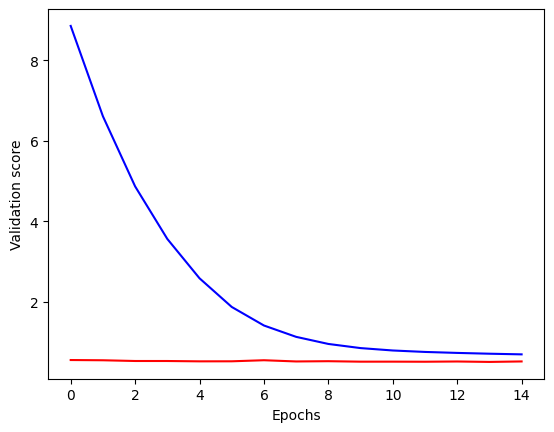

In [8]:
# The input shape to use in the first hidden layer
input_shape = (n_cols,)

# Create the new model: model_2
model_2 = Sequential()

# Add the first, second, and third hidden layers
model_2.add(Dense(10, activation='relu', input_shape=input_shape))
model_2.add(Dense(10, activation='relu'))
model_2.add(Dense(10, activation='relu'))

# Add the output layer
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model 1
model_1_training = model_1.fit(predictors, target, epochs=15, validation_split=0.4, verbose=False)

# Fit model 2
model_2_training = model_2.fit(predictors, target, epochs=15, validation_split=0.4, verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

Great work! The blue model is the one you made and the red is the original model. The model with the lower loss value is the better model.



### `07: Experimenting with model structures`
You've just run an experiment where you compared two networks that were identical except that the 2nd network had an extra hidden layer. You see that this 2nd network (the deeper network) had better performance. Given that, which of the following would be a good experiment to run next for even better performance?


- Try a new network with fewer layers than anything you have tried yet.
- Use more units in each hidden layer. ✅
- Use fewer units in each hidden layer.

Well done! Increasing the number of units in each hidden layer would be a good next step to try achieving even better performance.



### `08: Building your own digit recognition model`

You've reached the final exercise of the course - you now know everything you need to build an accurate model to recognize handwritten digits!

We've already done the basic manipulation of the MNIST dataset shown in the video, so you have `X` and `y` loaded and ready to model with. `Sequential` and `Dense` from `tensorflow.keras` are also pre-imported.

To add an extra challenge, we've loaded only 2500 images, rather than 60000 which you will see in some published results. Deep learning models perform better with more data, however, they also take longer to train, especially when they start becoming more complex.

If you have a computer with a CUDA compatible GPU, you can take advantage of it to improve computation time. If you don't have a GPU, no problem! You can set up a deep learning environment in the cloud that can run your models on a GPU. Here is a **[blog post](https://www.datacamp.com/community/tutorials/deep-learning-jupyter-aws)** by Dan that explains how to do this - check it out after completing this exercise! It is a great next step as you continue your deep learning journey.

Ready to take your deep learning to the next level? Check out **[Advanced Deep Learning with Keras](https://www.datacamp.com/courses/advanced-deep-learning-with-keras)** to see how the Keras functional API lets you build domain knowledge to solve new types of problems. Once you know how to use the functional API, take a look at **[Image Processing with Keras in Python](https://www.datacamp.com/courses/image-processing-with-keras-in-python)** to learn image-specific applications of Keras.


- Create a `Sequential` object to start your model. Call this `model`.
- Add the first `Dense` hidden layer of `50` units to your model with `'relu'` activation. For this data, the `input_shape` is `(784,)`.
- Add a second `Dense` hidden layer with `50` units and a `'relu'` activation function.
- Add the output layer. Your activation function should be `'softmax'`, and the number of nodes in this layer should be the same as the number of possible outputs in this case: `10`.
- Compile `model` as you have done with previous models: Using `'adam'` as the optimizer, `'categorical_crossentropy'` for the loss, and `metrics=['accuracy']`.
- Fit the model using `X` and `y` using a `validation_split` of `0.3` and `10` epochs.

In [17]:
import pandas as pd
from tensorflow.keras.utils import to_categorical

mnist = pd.read_csv("datasets/mnist.csv", header=None)
mnist

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.61,0.611,0.612,0.613,0.614,0.615,0.616,0.617
1,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1997,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1998,8,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1999,9,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [20]:
X = mnist.iloc[:, 1:].astype(np.float32).to_numpy()
y = to_categorical(mnist.iloc[:, 0])

In [27]:
# Create the model: model
model = Sequential()

# Add the first hidden layer
model.add(Dense(50, activation='relu', input_shape=(784,)))

# provide better performance ! 
#model.add(Dense(100, activation='relu', input_shape=(784,)))

# Add the second hidden layer
model.add(Dense(50, activation='relu'))
# provide better performance ! 
#model.add(Dense(100, activation='relu'))

# Add the output layer
model.add(Dense(10, activation='softmax'))


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(X,y, validation_split=0.3, epochs=10)

Epoch 1/10
44/44 [==============================] - 1s 7ms/step - loss: 20.6230 - accuracy: 0.3450 - val_loss: 7.2772 - val_accuracy: 0.4875
Epoch 2/10
44/44 [==============================] - 0s 4ms/step - loss: 3.5804 - accuracy: 0.6636 - val_loss: 4.3349 - val_accuracy: 0.6140
Epoch 3/10
44/44 [==============================] - 0s 4ms/step - loss: 1.7971 - accuracy: 0.7543 - val_loss: 4.2612 - val_accuracy: 0.6323
Epoch 4/10
44/44 [==============================] - 0s 4ms/step - loss: 1.0519 - accuracy: 0.8436 - val_loss: 3.5403 - val_accuracy: 0.6456
Epoch 5/10
44/44 [==============================] - 0s 4ms/step - loss: 0.6699 - accuracy: 0.8614 - val_loss: 2.9764 - val_accuracy: 0.6922
Epoch 6/10
44/44 [==============================] - 0s 4ms/step - loss: 0.4538 - accuracy: 0.8979 - val_loss: 2.8904 - val_accuracy: 0.6938
Epoch 7/10
44/44 [==============================] - 0s 4ms/step - loss: 0.2820 - accuracy: 0.9314 - val_loss: 2.7021 - val_accuracy: 0.7288
Epoch 8/10
44/44 [=

Congrats! You've done something pretty amazing. The code you wrote leads to a model that's 90% accurate at recognizing handwritten digits, even while using a small training set of only 1750 images!

